In [2]:
words = open('first_name.txt','r').read().splitlines()

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
words[:8]

['Aachal',
 'Aadharsh',
 'Aadhavi',
 'Aadhira',
 'Aadidev',
 'Aadil',
 'Aadita',
 'Aaditya']

In [5]:
words = [w.lower() for w in words]

In [6]:
words[:6]

['aachal', 'aadharsh', 'aadhavi', 'aadhira', 'aadidev', 'aadil']

In [7]:
len(words)

2195

In [8]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [86]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

# print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [87]:
X.shape

torch.Size([16382, 3])

In [88]:
X.shape

torch.Size([16382, 3])

In [89]:
X.dtype,Y.shape,Y.dtype

(torch.int64, torch.Size([16382]), torch.int64)

In [90]:
c = torch.rand(27,2)

In [91]:
c

tensor([[0.2890, 0.0795],
        [0.6477, 0.7482],
        [0.2606, 0.3130],
        [0.2893, 0.0320],
        [0.4326, 0.3873],
        [0.1710, 0.5586],
        [0.7467, 0.9334],
        [0.0765, 0.1461],
        [0.8056, 0.4484],
        [0.2379, 0.7886],
        [0.2829, 0.4952],
        [0.8996, 0.1029],
        [0.7679, 0.7474],
        [0.6287, 0.9062],
        [0.8756, 0.0994],
        [0.0837, 0.8847],
        [0.5227, 0.3597],
        [0.5860, 0.7284],
        [0.8798, 0.6484],
        [0.8960, 0.5019],
        [0.0667, 0.6019],
        [0.9788, 0.7667],
        [0.9442, 0.9268],
        [0.7851, 0.7516],
        [0.3498, 0.7991],
        [0.2120, 0.4495],
        [0.0400, 0.8642]])

In [15]:
c[3]

tensor([0.3647, 0.5556])

In [93]:
import torch.nn.functional as  f

In [94]:
t = f.one_hot(torch.tensor(3),num_classes = 27)

In [18]:
t.shape

torch.Size([27])

In [19]:
t.dtype

torch.int64

In [20]:
t.float()@c # we got the same c[3] = t@c

tensor([0.3647, 0.5556])

In [21]:
a = torch.tensor([1,0,1,0])

In [22]:
b = torch.tensor([[1,2],[3,4],[5,6],[7,8]])

In [23]:
a@b

tensor([6, 8])

In [95]:
C = torch.randn((27,2))

In [25]:
C

tensor([[ 0.9217,  2.5061],
        [ 1.0063, -0.3698],
        [ 0.3817, -0.4298],
        [ 0.4084, -1.4505],
        [ 0.9814, -0.0555],
        [-0.6049, -1.3640],
        [-0.4504, -1.4509],
        [ 1.6899,  0.1297],
        [ 0.3501,  0.0372],
        [ 0.1818,  0.7559],
        [-1.6460, -0.8525],
        [ 1.2439,  1.3356],
        [-0.7875, -1.2503],
        [ 0.3622,  1.0434],
        [ 1.7906,  0.6263],
        [-0.2222,  0.7003],
        [ 0.4812,  0.3756],
        [ 1.6206, -1.5410],
        [-2.4549,  1.2999],
        [ 1.6216,  0.2640],
        [-0.3794,  1.3907],
        [-0.5453,  1.3777],
        [-1.0380,  0.1971],
        [-0.6295,  0.1064],
        [-1.2217,  1.5101],
        [-0.7965,  0.8667],
        [ 2.1781, -0.6542]])

In [26]:
C.shape


torch.Size([27, 2])

In [27]:
C[5]

tensor([-0.6049, -1.3640])

In [28]:
X.shape

torch.Size([40, 3])

In [29]:
C[X].shape

torch.Size([40, 3, 2])

In [30]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  3],
        [ 1,  3,  8],
        [ 3,  8,  1],
        [ 8,  1, 12],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  4],
        [ 1,  4,  8],
        [ 4,  8,  1],
        [ 8,  1, 18],
        [ 1, 18, 19],
        [18, 19,  8],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  4],
        [ 1,  4,  8],
        [ 4,  8,  1],
        [ 8,  1, 22],
        [ 1, 22,  9],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  4],
        [ 1,  4,  8],
        [ 4,  8,  9],
        [ 8,  9, 18],
        [ 9, 18,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  4],
        [ 1,  4,  9],
        [ 4,  9,  4],
        [ 9,  4,  5],
        [ 4,  5, 22]])

In [31]:
X[14,2]

tensor(19)

In [32]:
C[X][14,2] # this is all about the indexing

tensor([1.6216, 0.2640])

In [33]:
C[19]

tensor([1.6216, 0.2640])

In [96]:
emb = C[X]
emb.shape

torch.Size([16382, 3, 2])

In [97]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)

In [36]:
h = torch.tanh(emb.view(-1,6)@w1+b1)

In [37]:
h

tensor([[-1.0000,  0.9998, -1.0000,  ..., -0.9975, -0.9903, -1.0000],
        [ 0.7334,  0.9984, -0.9910,  ..., -0.9187, -0.9397, -1.0000],
        [ 0.9936,  0.9998, -0.6026,  ..., -0.7893,  0.7041, -0.7928],
        ...,
        [-0.9810,  0.8918, -0.7852,  ...,  0.2934,  0.8944, -0.9973],
        [ 1.0000,  0.9697, -0.0893,  ...,  0.2294, -0.7643, -0.5562],
        [ 0.8534,  0.9535,  0.7604,  ..., -0.7628,  0.8532,  0.7970]])

In [38]:
h.shape # 100 activations for 40 examples for there are 100 neurons in our hidden layer and there are 40 examples

torch.Size([40, 100])

In [39]:
h[0] # activation of 100 neurons for the first input

tensor([-1.0000,  0.9998, -1.0000,  0.5783, -1.0000, -1.0000, -1.0000, -0.9879,
         1.0000,  0.3149, -0.9989, -1.0000, -1.0000,  0.9994, -1.0000,  0.9993,
         0.9821, -0.0408,  0.6834, -0.9956,  0.0995,  1.0000, -0.9989,  0.9858,
         1.0000, -0.9974, -0.9969, -0.9089,  0.9979, -0.9994,  0.9772,  0.9926,
         0.6845, -0.9746,  1.0000,  0.9931, -0.9971,  0.8649, -0.9870, -0.2394,
        -0.9178, -0.9670, -0.8310,  1.0000, -0.4672, -1.0000,  0.8339,  0.9568,
         0.9219, -0.9971, -0.7773,  1.0000,  0.9989,  0.8568,  0.1586, -0.9904,
         0.9995, -1.0000, -0.5903,  0.8766, -0.8781,  1.0000, -1.0000,  0.9479,
        -0.8715,  1.0000, -0.9112, -0.5795,  0.9823, -0.9002, -0.1215,  0.9994,
         0.9973,  0.7959, -0.9998, -0.7772, -0.8649, -0.6257,  1.0000,  0.8943,
         1.0000, -0.9621, -0.9979, -1.0000,  0.1353,  0.9151,  1.0000, -0.9400,
         0.9070,  1.0000,  0.7399,  1.0000, -1.0000, -0.6124,  0.3347, -1.0000,
         1.0000, -0.9975, -0.9903, -1.00

In [40]:
h[:,0] ## activation of the first neuron for 40 examples

tensor([-1.0000,  0.7334,  0.9936,  0.9795, -0.7482, -0.9616,  0.9999, -1.0000,
         0.7334,  0.9936, -0.9876, -0.9784, -0.7704, -0.4467, -0.9980,  1.0000,
        -1.0000,  0.7334,  0.9936, -0.9876, -0.9784, -0.7704,  0.7947, -0.9968,
        -1.0000,  0.7334,  0.9936, -0.9876, -0.9784, -0.9976, -0.6580,  0.9878,
        -1.0000,  0.7334,  0.9936, -0.9876, -0.9995, -0.9810,  1.0000,  0.8534])

In [41]:
w2 = torch.randn((100,27)) # 100 is the number of inputs and 27 is the number of neurons in the next layer
# this is our ouput layer and has 27 neurons as we have 27 outputs
b2 = torch.randn(27)

In [42]:
logits = h@w2+b2

In [43]:
logits.shape

torch.Size([40, 27])

In [44]:
counts = logits.exp()
probs = counts / counts.sum(1,keepdims = True)
probs.shape # there are 40 training examples and we have 27 outputs for one single training example

torch.Size([40, 27])

In [45]:
# we want the probability assigned to the real next chracter
Y

tensor([ 1,  1,  3,  8,  1, 12,  0,  1,  1,  4,  8,  1, 18, 19,  8,  0,  1,  1,
         4,  8,  1, 22,  9,  0,  1,  1,  4,  8,  9, 18,  1,  0,  1,  1,  4,  9,
         4,  5, 22,  0])

In [71]:
# so Y is the next right token/character to come next
probs[torch.arange(40),Y] # these are the probs assigned by our model to the correct next character

tensor([3.3598e-11, 1.9768e-08, 2.0984e-05, 2.4494e-01, 6.6873e-05, 3.3669e-07,
        7.2495e-06, 3.3598e-11, 1.9768e-08, 4.5371e-12, 1.2810e-06, 3.9147e-10,
        6.2545e-05, 2.1668e-06, 2.8837e-13, 2.7465e-13, 3.3598e-11, 1.9768e-08,
        4.5371e-12, 1.2810e-06, 3.9147e-10, 2.2277e-06, 4.9442e-10, 4.4980e-11,
        3.3598e-11, 1.9768e-08, 4.5371e-12, 1.2810e-06, 3.2524e-09, 8.4743e-08,
        3.8729e-05, 1.4232e-09, 3.3598e-11, 1.9768e-08, 4.5371e-12, 5.7234e-08,
        4.9336e-09, 6.6754e-09, 3.3915e-09, 3.1535e-08])

In [72]:
loss = -probs[torch.arange(40),Y].log().mean()
loss

tensor(18.5714)

## summary

In [143]:
g = torch.Generator().manual_seed(2147) # for reproducibility
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g  )
w2 = torch.randn((100, 27), generator=g )
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

In [144]:
for p in parameters:
  p.requires_grad = True

In [137]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [109]:
k_vales = []
loss_vales = []
for k in range(40):
  emb = C[X]
  h = torch.tanh(emb.view(-1,6)@w1+b1)
  logits = h@w2+b2
  # counts = logits.exp()
  probs = counts / counts.sum(1,keepdims = True)
  # loss = -probs.log().mean()
  loss = f.cross_entropy(logits,Y)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient descent
  for p in parameters:
    p.data+=-0.4*p.grad
  print(k,loss.item())
  k_vales.append(k)
  loss_vales.append(loss.item())


0 3.0776028633117676
1 2.6170454025268555
2 2.50870418548584
3 2.496213674545288
4 2.491098642349243
5 2.4868288040161133
6 2.4852964878082275
7 2.482588529586792
8 2.482762336730957
9 2.480666399002075
10 2.482431411743164
11 2.4804632663726807
12 2.484006404876709
13 2.481621742248535
14 2.4871013164520264
15 2.4836151599884033
16 2.490961790084839
17 2.485722541809082
18 2.494584798812866
19 2.4872817993164062
20 2.4971723556518555
21 2.48797345161438
22 2.498483419418335
23 2.4878528118133545
24 2.4987435340881348
25 2.4871604442596436
26 2.4983246326446533
27 2.486138343811035
28 2.497530698776245
29 2.4849517345428467
30 2.4965507984161377
31 2.4836955070495605
32 2.4954843521118164
33 2.4824166297912598
34 2.4943792819976807
35 2.481135129928589
36 2.493255853652954
37 2.479860782623291
38 2.492124557495117
39 2.47859525680542


### Choosing the correct value of the learning rate

In [138]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [140]:
lr_values = []
loss_values = []
for i in range(1000):

  emb = C[X]
  h = torch.tanh(emb.view(-1,6)@w1+b1)
  logits = h@w2+b2
  # counts = logits.exp()
  # probs = counts / counts.sum(1,keepdims = True)
  # loss = -probs.log().mean()
  loss = f.cross_entropy(logits,Y)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient descent
  for p in parameters:
    p.data+=-lrs[i]*p.grad

  lr_values.append(lrs[i])
  loss_values.append(loss.item())


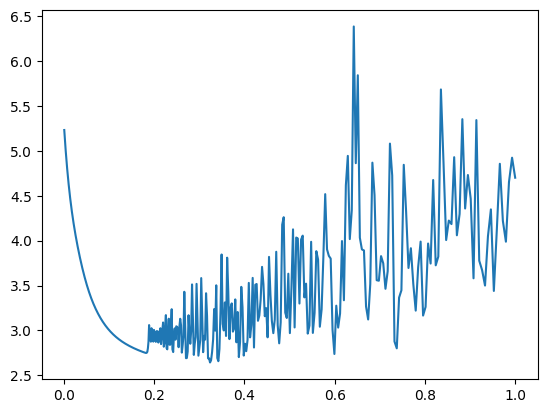

In [141]:
plt.plot(lr_values,loss_values)

In [142]:
# so around 0.2

In [147]:

for i in range(1000):

  emb = C[X]
  h = torch.tanh(emb.view(-1,6)@w1+b1)
  logits = h@w2+b2
  # counts = logits.exp()
  # probs = counts / counts.sum(1,keepdims = True)
  # loss = -probs.log().mean()
  loss = f.cross_entropy(logits,Y)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient descent
  for p in parameters:
    p.data+=-0.2*p.grad
print(loss.item())

2.243673086166382


In [151]:
# now decreasing the loss in the end of training

for i in range(1000):

  emb = C[X]
  h = torch.tanh(emb.view(-1,6)@w1+b1)
  logits = h@w2+b2
  # counts = logits.exp()
  # probs = counts / counts.sum(1,keepdims = True)
  # loss = -probs.log().mean()
  loss = f.cross_entropy(logits,Y)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient descent
  for p in parameters:
    p.data+=-0.14*p.grad
print(loss.item())

2.2080161571502686


### Breaking data into train,test and validation set

In [152]:
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([13163, 3]) torch.Size([13163])
torch.Size([1611, 3]) torch.Size([1611])
torch.Size([1608, 3]) torch.Size([1608])


In [153]:
# trainins set examples
n1

1756

In [154]:
# validation examples
n2-n1

219

In [156]:
# test examples
len(words)-n2

220

### Using batches to train the model

In [161]:
stepi,lossi = [],[]

In [162]:
g = torch.Generator().manual_seed(2147) # for reproducibility
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g  )
w2 = torch.randn((100, 27), generator=g )
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

In [163]:
for p in parameters:
  p.requires_grad = True

In [165]:
for i in range(1000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.2
  for p in parameters:
    p.data += -lr * p.grad


  stepi.append(i)
  lossi.append(loss.item())
print(loss.item())

2.293818712234497


In [168]:
# evaluating the loss on validation set
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.5933234691619873


In [169]:
# calculating loss at the test set
emb = C[Xte] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.5093555450439453


### Incereasing the neurons in the hidden layer

In [173]:
g = torch.Generator().manual_seed(2147) # for reproducibility
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 300), generator=g) # makinng the number of neurons to 300 instead of 100
b1 = torch.randn(300, generator=g  )
w2 = torch.randn((300, 27), generator=g )
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
print(sum(p.nelement() for p in parameters))

10281


In [174]:
stepi = []
lossi= []
for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.2
  for p in parameters:
    p.data += -lr * p.grad


  stepi.append(i)
  lossi.append(loss.item())
print(loss.item())

2.300715684890747


In [183]:
stepi = []
lossi= []
for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.08
  for p in parameters:
    p.data += -lr * p.grad


  stepi.append(i)
  lossi.append(loss.item())
print(loss.item())

2.1751997470855713


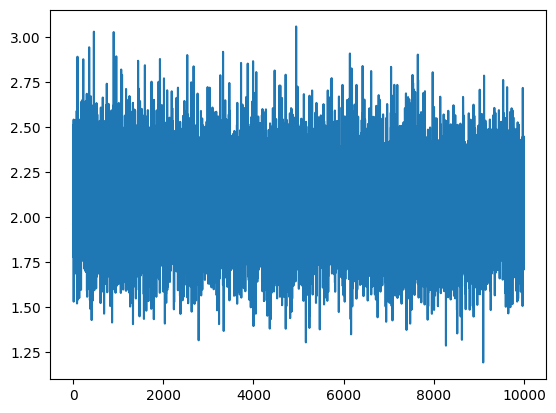

In [184]:
plt.plot(stepi,lossi)

In [185]:
# evaluating the loss on validation set
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.3407180309295654


### Visualising the embdding matrix C for all the characters a to z

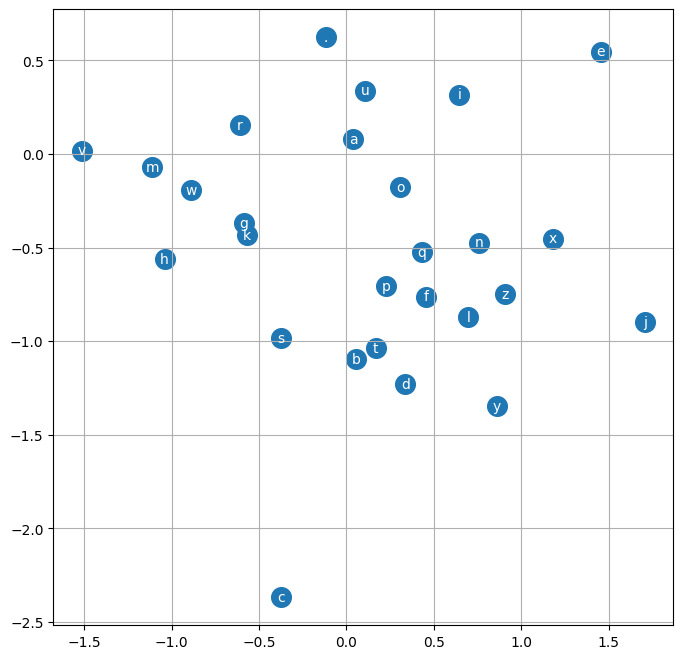

In [187]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [188]:
## notice how vowels a,e,i,o,u are kind of grouped together

### Expanding the embedding size

In [227]:
g = torch.Generator().manual_seed(2147) # for reproducibility
C = torch.randn((27, 3), generator=g) # now we are using 3 instead of 2 for each character
w1 = torch.randn((9, 300), generator=g) # so this layer will receive 3*3  inputs
b1 = torch.randn(300, generator=g  )
w2 = torch.randn((300, 27), generator=g )
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
print(sum(p.nelement() for p in parameters))

11208


In [228]:
stepi = []
lossi= []
for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 9) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.2 if i<8000 else 0.02
  for p in parameters:
    p.data += -lr * p.grad


  stepi.append(i)
  lossi.append(loss.log10().item())
print(loss.item())

1.855973243713379


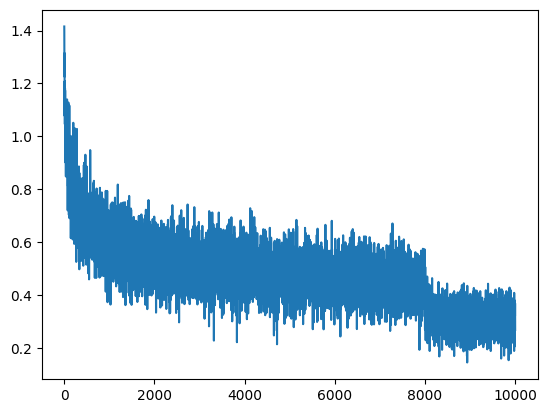

In [229]:
plt.plot(stepi,lossi)

In [215]:
# evaluating the loss on validation set
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 9) @ w1 + b1) # (32, 200) we have to change the view to (-1,9)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2179598808288574


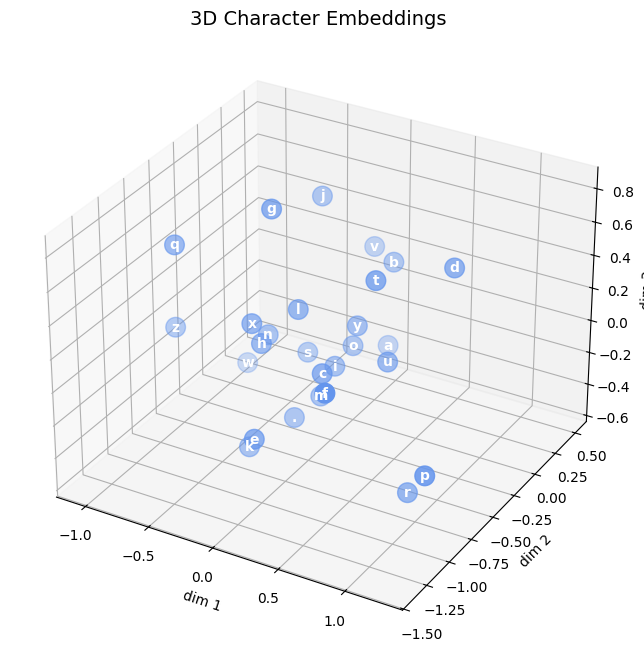

In [216]:
  # enables interactive 3D plots in notebooks

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter
ax.scatter(C[:, 0].data, C[:, 1].data, C[:, 2].data, s=200, color='cornflowerblue')

# Label each point
for i in range(C.shape[0]):
    ax.text(
        C[i, 0].item(),
        C[i, 1].item(),
        C[i, 2].item(),
        itos[i],
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        weight='bold'
    )

ax.set_title("3D Character Embeddings", fontsize=14)
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Using 10 dimensional embeddings

In [218]:
g = torch.Generator().manual_seed(2147) # for reproducibility
C = torch.randn((27, 10), generator=g) # now we are using 10 instead of 2 for each character
w1 = torch.randn((30, 300), generator=g) # so this layer will receive 3*10  inputs
b1 = torch.randn(300, generator=g  )
w2 = torch.randn((300, 27), generator=g )
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
print(sum(p.nelement() for p in parameters))



17697


In [220]:
stepi = []
lossi= []
for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ w1 + b1) # (32, 200) h here should be -1,30 now
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.2 if i<8000 else 0.02
  for p in parameters:
    p.data += -lr * p.grad


  stepi.append(i)
  lossi.append(loss.log10().item())
print(loss.item())

2.429971694946289


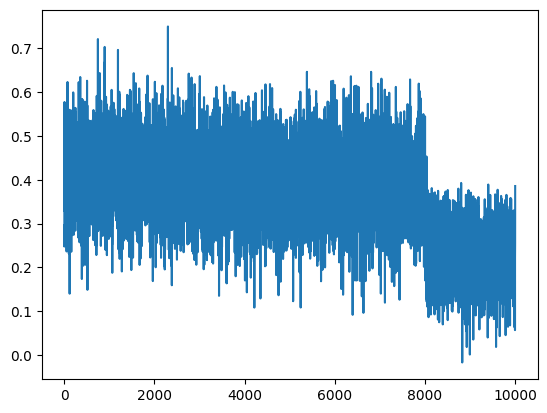

In [221]:
plt.plot(stepi,lossi)

In [222]:
# evaluating the loss on validation set
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ w1 + b1) # (32, 200) we have to change the view to (-1,9)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.727308988571167


In [236]:
# sample from the model
g = torch.Generator().manual_seed(99+1)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

bcibouba
lpboa
.bkbswja
wbja
tbivtiwba
tjeexjtia
tiba
bcivcsbkvohibboa
boojwba
qsbta
ijtzbnbka
nboa
bokjmja
hbsja
wbsuiba
tibvjcbsba
sfinbtibbozba
lfwbouia
tijua
rzja
